In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../005_src/') #use relative path
#os.chdir("../005_src")

from config import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [2]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [3]:
this_date = "20210720"
ts = "20h25m21s"
GCN_num = "011"
this_GCN = f"GCN_{GCN_num}"
print (this_GCN)

GCN_011


In [4]:
# do NOT overwrite this_date and ts above
import_specific_GCN_model(GCN_num)


at 11h04m33s imported models:
['GCN_HL01', 'GCN_HL02', 'GCN_HL03']
edges_attr=True
imported trainer: GCN_011 at 11h04m33s


('GCN_011', '11h04m33s')

## Reload dictionary

In [8]:

MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)

dateset_test_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/dataset_test"
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

#dateset_test = pkl.load(open(f'{dateset_test_path}.pkl',"rb"))

#reloaded_dict = read_txt_data(f'{dict_text_output_path}.txt', split_char = ": ")#pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
#reloaded_dict

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/20210720-20h25m21s/


In [17]:
input_file_name = "20210710-20h25m21s_timesteps14930_ec3500_em7000"
#reloaded_dict["model_architecture"]

## Plot losses

In [10]:
# load losses
t_losses_load = pkl.load(open("/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/20210720-20h25m21s/20210720-20h25m21sEPOCH_75000of100000_training_loss.pkl", 'rb'))
v_losses_load = pkl.load(open( "/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/20210720-20h25m21s/20210720-20h25m21sEPOCH_75000of100000_validation_loss.pkl", 'rb'))

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/20210720-20h25m21s/20210720-20h25m21s_train_val_loss_plot.png


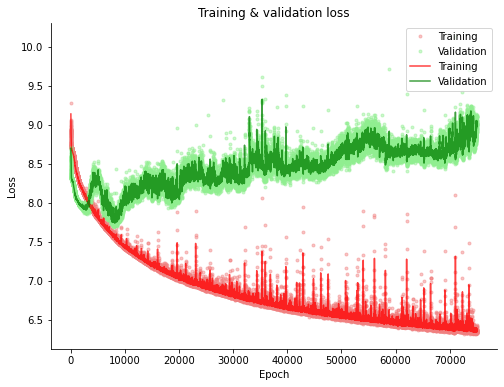

In [11]:
##================================
# TRAIN AND VAL LOSSES
##================================
fig = plot_training(t_losses_load,
                  v_losses_load,
                  learning_rate = None,
                  gaussian=True,
                  sigma=2,
                  figsize=(8, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

## Verification
of results

In [12]:
hidden_layers_sizes = [128, 256, 64]
size_input = 6
size_output = 3
random_seed = 4562

In [13]:
from _03_Networks.GCN_011.GCN_model_011 import GCN_HL01,GCN_HL02,GCN_HL03
from _03_Networks.GCN_011.GCN_trainer_011 import Trainer, check_import

num_hidden_layers = len(hidden_layers_sizes)
if num_hidden_layers == 1:

            hc_1 = hidden_layers_sizes[0]
            hc_2 = None
            hc_3 = None

            model = GCN_HL01(
                                num_input_features=size_input,
                                num_output_features =size_output,
                                random_seed = random_seed,
                                hc_1 = hc_1,
                               )
elif num_hidden_layers == 2:

            hc_1 = hidden_layers_sizes[0]
            hc_2 = hidden_layers_sizes[1]
            hc_3 = None

            model = GCN_HL02(
                                num_input_features=size_input,
                                num_output_features =size_output,
                                random_seed = random_seed,
                                hc_1 = hc_1,
                                hc_2 = hc_2,
                               )
elif num_hidden_layers == 3:

            hc_1 = hidden_layers_sizes[0]
            hc_2 = hidden_layers_sizes[1]
            hc_3 = hidden_layers_sizes[2]

            model = GCN_HL03(
                                num_input_features=size_input,
                                num_output_features =size_output,
                                random_seed = random_seed,
                                hc_1 = hc_1,
                                hc_2 = hc_2,
                                hc_3 = hc_3,
                               )
else:
            print (f"ERROR: model with {num_hidden_layers=} not implemented")
            print (f"using first three layers")

            hc_1 = hidden_layers_sizes[0]
            hc_2 = hidden_layers_sizes[1]
            hc_3 = hidden_layers_sizes[2]

            model = GCN_HL03(num_input_features=size_input,
                        num_output_features =size_output,
                        random_seed = random_seed,
                        hc_1 = hc_1,
                        hc_2 = hc_2,
                        hc_3 = hc_3,
                       )
load_model = model

In [15]:
load_path = "/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/20210720-20h25m21s/20210720-20h25m21sEPOCH_75000of100000_GCN_011.pt"
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

GCN_HL03(
  (conv1): GCNConv(6, 128)
  (conv2): GCNConv(128, 256)
  (conv3): GCNConv(256, 64)
  (conv4): GCNConv(64, 3)
)

In [22]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_DATASETS = os.path.join(MODEL_OUTPUT_PATH,f"DATASETS/")
datasets_list = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'*_timesteps14930_ec3500_em7000_dataset*',
                                     recursive=True))
print (MODEL_OUTPUT_PATH_DATASETS,input_file_name)
if len( datasets_list) == 5:                               
        print ("\n> DATASETS FOUND")
        print (*datasets_list, sep = "\n")
        
        dataset_train = torch.load(datasets_list[0], map_location=torch.device('cpu') )
        # map_location=lambda storage, loc: storage.cuda(0))
        dataset_val = torch.load(datasets_list[1], map_location=torch.device('cpu') )
        dataset_test = torch.load(datasets_list[2], map_location=torch.device('cpu') )
        dataset_shuttle_train = torch.load(datasets_list[3], map_location=torch.device('cpu') )
        dataset_shuttle_val = torch.load(datasets_list[4], map_location=torch.device('cpu') )

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/DATASETS/ 20210710-20h25m21s_timesteps14930_ec3500_em7000

> DATASETS FOUND
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/DATASETS/20210710-20h38m27s_timesteps14930_ec3500_em7000_dataset_01_train.pt
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/DATASETS/20210710-20h38m27s_timesteps14930_ec3500_em7000_dataset_02_validation.pt
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/DATASETS/20210710-20h38m27s_timesteps14930_ec3500_em7000_dataset_03_test.pt
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/DATASETS/20210710-20h38m27s_timesteps14930_ec3500_em7000_dataset_04_shuttle_train.pt
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/DATASETS/20210710-20h38m27s_timesteps14930_ec3500_em7000_dataset_05_shuttle_val.pt


In [23]:
dataset_test

[Data(edge_attr=[21], edge_index=[2, 21], x=[7, 6], y=[7, 3]),
 Data(edge_attr=[3], edge_index=[2, 3], x=[3, 6], y=[3, 3]),
 Data(edge_attr=[21], edge_index=[2, 21], x=[7, 6], y=[7, 3]),
 Data(edge_attr=[45], edge_index=[2, 45], x=[10, 6], y=[10, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 3]),
 Data(edge_attr=[21], edge_index=[2, 21], x=[7, 6], y=[7, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3]),
 Data(edge_attr=[15], edge_index=[2, 15], x=[6, 6], y=[6, 3]),
 Data(edge_attr=[3], edge_index=[2, 3], x=[3, 6], y=[3, 3]),
 Data(edge_attr=[21], edge_index=[2, 21], x=[7, 6], y=[7, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3]),
 Data(edge_attr=[45], edge_index=[2, 45], x=[10, 6], y=[10, 3]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3

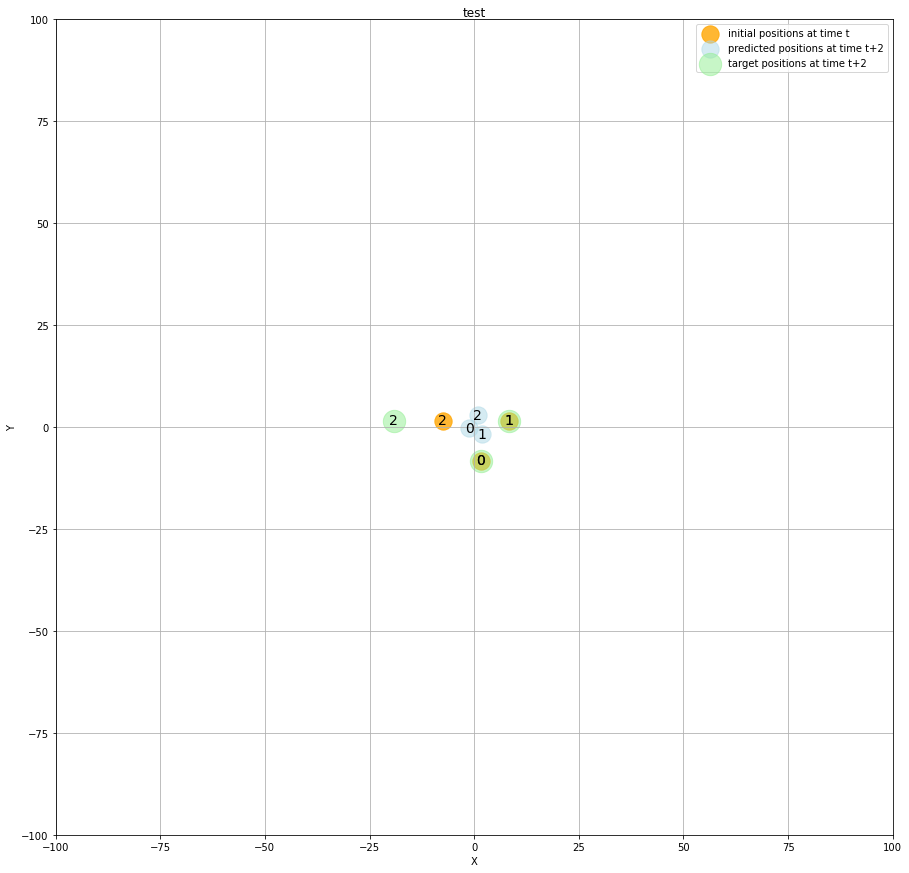

In [24]:
plot_results_model(
                   load_model, 
                   dataset_test[1],
                   start_from = 0,
                   end_at = 10,
                   edges_attr = True,
                   figsize = (15,15),
                   plot_input = True,
                   plot_target = True,
                   plot_prediction = True,
                   plot_intention = False, 
                   title = "test",
    
                   xlim = (-100,100),
                   ylim = (-100,100),
                  )

In [25]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_validation_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

1it [00:00,  8.64it/s]

found 35 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/20210720-20h25m21s/figures_validation_set/
the gif will be create using the first 35 images


35it [00:03,  9.76it/s]


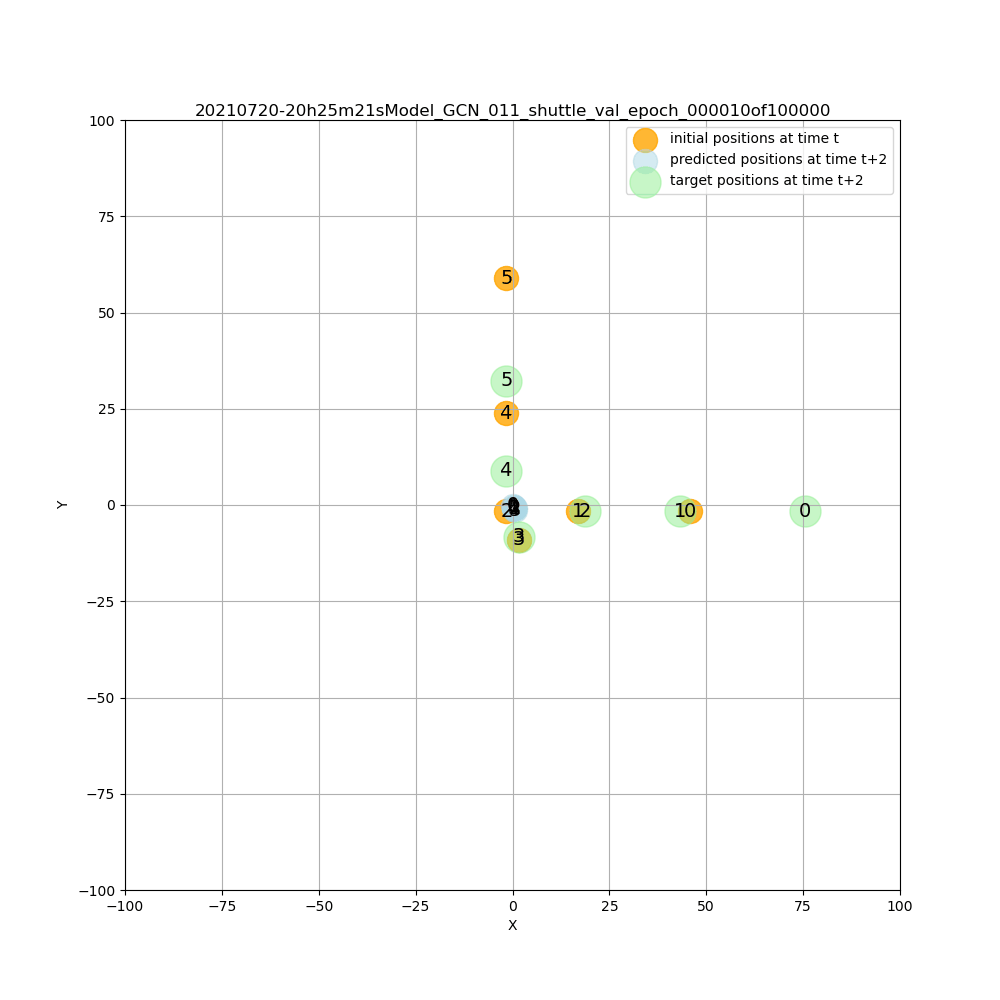

In [26]:
Image(open(f'{path_GIF}','rb').read())

In [27]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_training_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

1it [00:00,  8.73it/s]

found 35 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_011/20210720-20h25m21s/figures_training_set/
the gif will be create using the first 35 images


35it [00:03, 10.59it/s]


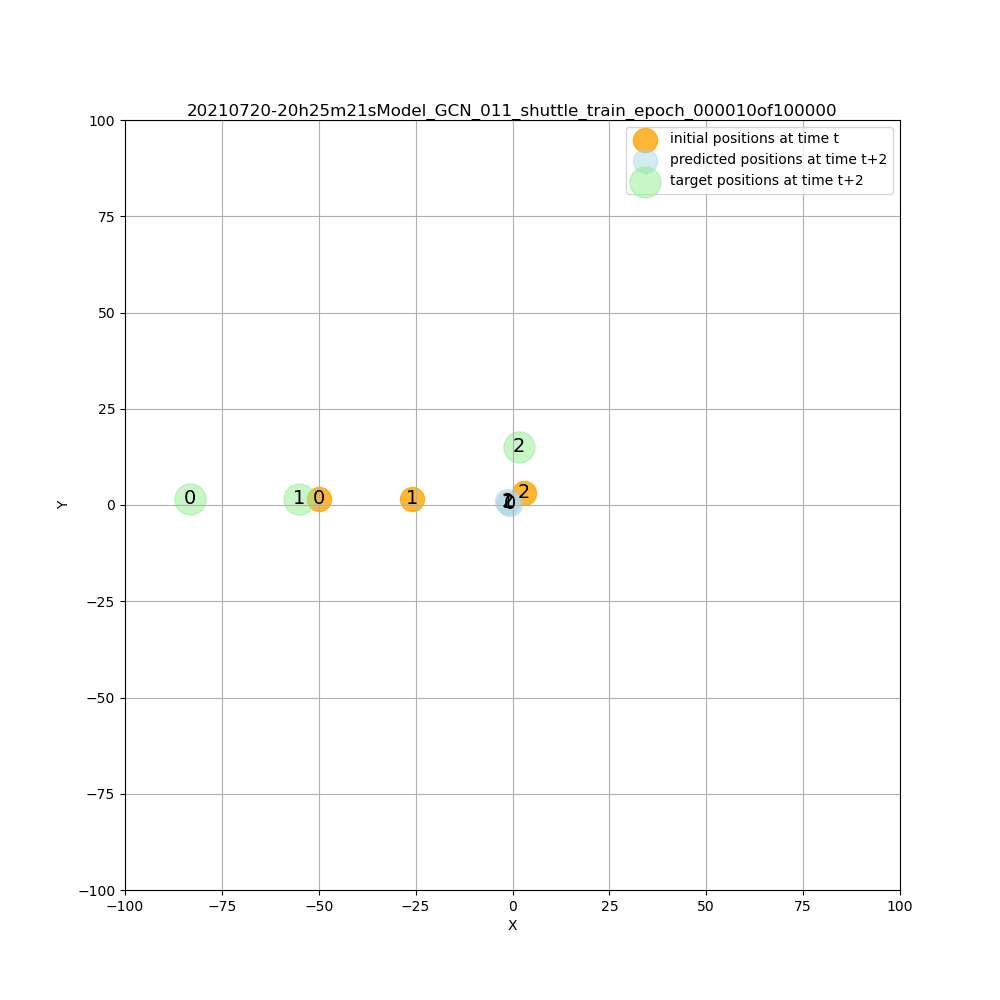

In [28]:
Image(open(f'{path_GIF}','rb').read())

In [31]:
deleted_folders = delete_empty_r(directory= MODEL_OUTPUT_PATH,printstat = True)